In [1]:
import numpy as np

In [2]:
ndata = 11
x = np.linspace(0, 1, ndata)

In [3]:
k = 1.3
b = 0.5
y = k*x + b

In [4]:
np.random.seed(40)
data = y*(1 + np.random.normal(loc=0, scale=0.10, size=ndata))

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
true_x = np.linspace(0, 1, 100)
true_y = k*true_x + b

In [7]:
from scipy import stats

In [8]:
p, V = np.polyfit(x, data, 1, cov=True)

In [13]:
print(p)
print("--"*20)
print(V)

[1.4705246  0.45184833]
----------------------------------------
[[ 0.01370245 -0.00685122]
 [-0.00685122  0.00479586]]


In [14]:
print("slope: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

slope: 1.4705245980113544 +/- 0.11705745170034831
intercept: 0.45184832593760443 +/- 0.06925212234655904


In [15]:
fitted_y = p[0]*true_x + p[1]

In [16]:
fitted_y_err = []
for xi in true_x:
    variance_y = np.matmul(np.array([xi, 1]), np.matmul(V, np.array([xi, 1]).transpose()))
    fitted_y_err.append(np.sqrt(variance_y))
fitted_y_err = np.array(fitted_y_err)

In [17]:
fitted_y_up = fitted_y + fitted_y_err
fitted_y_down = fitted_y - fitted_y_err

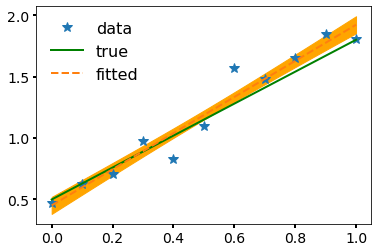

In [18]:
plt.plot(x, data, 'o', label='data')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=14)
plt.savefig("linear_data.png")

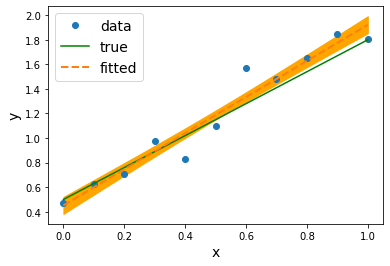

In [28]:
plt.plot(x, data, 'o', label='data')
plt.plot(true_x, true_y, '-', color='g', label='true')
plt.plot(true_x, fitted_y, '--', label='fitted', lw=2)
plt.fill_between(true_x, fitted_y_down, fitted_y_up, color='orange')
plt.legend(fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.savefig("line_fit_with_error.png")

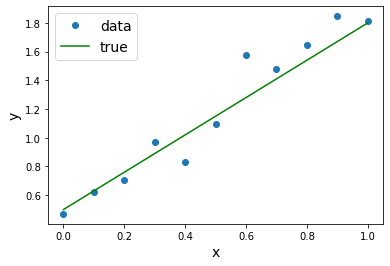

In [31]:
plt.plot(x, data, 'o', label='data')
plt.plot(true_x, true_y, '-', color='g', label='true')
# plt.plot(true_x, fitted_y, '--', label='fitted', lw=2)
# plt.fill_between(true_x, fitted_y_down, fitted_y_up, color='orange')
plt.legend(fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.savefig("line_fit_no_error.png")

In [19]:
M = [
    [xi, 1] for xi in x
]

M = np.array(M)
print(M)

[[0.  1. ]
 [0.1 1. ]
 [0.2 1. ]
 [0.3 1. ]
 [0.4 1. ]
 [0.5 1. ]
 [0.6 1. ]
 [0.7 1. ]
 [0.8 1. ]
 [0.9 1. ]
 [1.  1. ]]


In [20]:
p2, res2, rank2, s2  = np.linalg.lstsq(M, data, rcond=-1)

In [27]:
res2

array([0.13565423])

In [29]:
epsilon = data - np.dot(M, p2)
print(np.dot(epsilon.T, epsilon))

0.13565422528593593


In [26]:
cov = np.linalg.inv(M.T@M)
fac = res2 / (M.shape[0]-M.shape[1])
print(cov*fac)

[[ 0.01370245 -0.00685122]
 [-0.00685122  0.00479586]]


In [24]:
scale = np.sqrt((M*M).sum(axis=0))
lhs = M/scale
p3, res3, rank3, s3  = np.linalg.lstsq(lhs, data, rcond=-1)
cov2 = np.linalg.inv(np.dot(lhs.T, lhs)) / np.outer(scale, scale)
fac2 = res3 / (M.shape[0]-M.shape[1]-1)
print(cov2*fac2)

[[ 0.01541525 -0.00770763]
 [-0.00770763  0.00539534]]


In [22]:
V

array([[ 0.01370245, -0.00685122],
       [-0.00685122,  0.00479586]])

In [38]:

scale

array([1.96214169, 3.31662479])

In [39]:
np.outer(scale, scale)

array([[ 3.85      ,  6.50768776],
       [ 6.50768776, 11.        ]])

array([[ 0.90909091, -0.45454545],
       [-0.45454545,  0.31818182]])

In [50]:
fac = res2 / (M.shape[0] - 1)
fac

array([0.01356542])

In [32]:
print(V)

[[ 0.01370245 -0.00685122]
 [-0.00685122  0.00479586]]


In [30]:
print("Fitted parameters:", p2)
print("residuals:", res2)
print("rank of M:\t", rank2)
print("singular values of M:", s2)

Fitted parameters: [1.4705246  0.45184833]
residuals: [0.13565423]
rank of M:	 2
singular values of M: [3.73962207 0.93017566]


In [58]:
res3 = data - np.matmul(M, p2)

In [60]:
np.dot(res3.T, res3)

0.13565422528593593

In [59]:
res2

array([0.13565423])

In [18]:
print(" & ".join([str(i) for i in x]))
print(" & ".join(["{:.2f}".format(i) for i in data]))

0.0 & 0.1 & 0.2 & 0.30000000000000004 & 0.4 & 0.5 & 0.6000000000000001 & 0.7000000000000001 & 0.8 & 0.9 & 1.0
0.47 & 0.62 & 0.71 & 0.97 & 0.83 & 1.10 & 1.57 & 1.48 & 1.65 & 1.85 & 1.81


In [12]:
import matplotlib
print(matplotlib.__version__)

3.3.0


# P-values

In [42]:
from scipy.stats import norm

In [104]:
nbkg = 5000
nsb = 5000
background = np.random.normal(10, 4.4, nbkg)
sb = np.random.normal(16, 3, nsb)

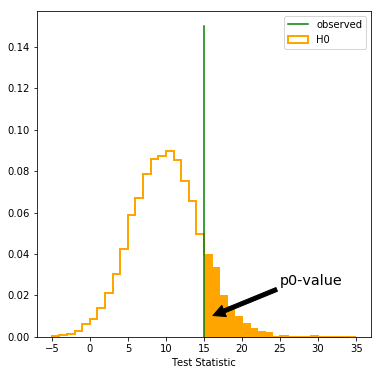

In [112]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
x_range = (-5, 35)
nbins = 40
ndata = 15
# hist_sb, bins, _ = ax.hist(sb, histtype='step', bins=nbins, 
#                            range=x_range, lw=2, label='H1',
#                            color='blue', normed=1
#                           )
hist_b, bins, _ = ax.hist(background, histtype='step', 
                          bins=nbins, range=x_range, lw=2, label='H0',
                          color='orange', normed=1
                         )
ax.plot([ndata, ndata], [0, 0.15], label="observed", color='green')

idatabin = 0
for ibin,bin_val in enumerate(bins):
    if bin_val >= ndata:
        break
    else:
        idatabin = ibin
        
ax.fill_between(bins[ibin:][:-1], 0, hist_b[ibin:], color='orange', step='post')
ax.annotate("p0-value", xy=(16, 0.01), xytext=(25, 0.025), 
            arrowprops=dict(facecolor='black', shrink=0.02), fontsize='x-large')
ax.set_xlabel("Test Statistic")
ax.legend()
plt.savefig("p0_demo.eps")

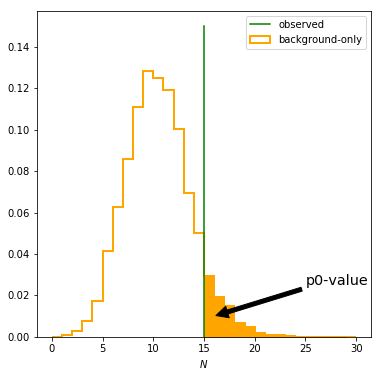

In [33]:
np.random.seed(40)
bkg_poisson = np.random.poisson(10, 5000)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
x_range = (0, 30)
nbins = 30

ndata = 15

hist_b, bins, _ = ax.hist(bkg_poisson, histtype='step', 
                          bins=nbins, range=x_range, lw=2, label='background-only',
                          color='orange', normed=1
                         )
ax.plot([ndata, ndata], [0, 0.15], label="observed", color='green')

idatabin = 0
for ibin,bin_val in enumerate(bins):
    if bin_val >= ndata:
        break
    else:
        idatabin = ibin

idatabin += 1
ax.fill_between(bins[idatabin:][:-1], 0, hist_b[idatabin:], color='orange', step='post')
ax.annotate("p0-value", xy=(16, 0.01), xytext=(25, 0.025), 
            arrowprops=dict(facecolor='black', shrink=0.02), fontsize='x-large')
ax.set_xlabel("$N$")
ax.legend()
plt.savefig("p0_demo.eps")

In [34]:
print(sum(hist_b[idatabin:]))

0.0788


In [36]:
import ROOT

Welcome to JupyROOT 6.12/04


In [39]:
ROOT.Math.normal_quantile(1- 0.0788, 1)

1.413189544250503

In [38]:
ROOT.Math.normal_cdf(5)

0.9999997133484282

In [40]:
ROOT.RooStats.PValueToSignificance(0.0788)

1.413189544250503


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [58]:
def mkTestData(NX, dim=1):
    def anthonyFunc(x):
        return 2*x**2 + 1 
        # return x**3-x**2

    NR = 1
    np.random.seed(555)
    X = 10*np.random.rand(NX, dim) -1
    Y = np.array([anthonyFunc(*x) for x in X]) 
    Y = Y + Y * np.random.normal(loc=0, scale=0.01, size=NX)
    return X, Y

In [59]:
X, Y = mkTestData(5)

In [60]:
X

array([[ 6.17834087],
       [-0.52144867],
       [ 8.44471978],
       [ 5.8638004 ],
       [ 4.81207334]])

In [61]:
Y

array([ 78.23359448,   1.52022052, 141.37059159,  69.57021681,
        47.56525562])

In [62]:
X = np.array([[ 0.49445989],
 [-1.        ],
 [ 1.        ],
 [ 0.42429826],
 [ 0.18969927]])

In [63]:
p0, V0 = np.polyfit(X.reshape(-1), Y, 2, cov=True)

In [64]:
p0

array([38.18657385, 70.03968029, 33.33312084])

In [65]:
V0

array([[ 0.7327914 ,  0.11294757, -0.38564695],
       [ 0.11294757,  0.29204315, -0.1203251 ],
       [-0.38564695, -0.1203251 ,  0.33810263]])

In [66]:
VM = np.array(
[[ 1.,          0.49445989,  0.24449058],
 [ 1.,         -1.         , 1.        ],
 [ 1.,          1.        ,  1.        ],
 [ 1. ,         0.42429826,  0.18002902],
 [ 1.,          0.18969927,  0.03598581]]
)

In [67]:
p1, r1, rank1, s1 = np.linalg.lstsq(VM, Y, rcond=-1)

In [68]:
p1

array([33.33312084, 70.03968028, 38.18657384])

In [69]:
r1

array([1.21650322])

In [70]:
cov = np.linalg.inv(VM.T@VM)

In [72]:
cov * r1 / 2

array([[ 0.33810271, -0.12032513, -0.38564704],
       [-0.12032513,  0.29204322,  0.1129476 ],
       [-0.38564704,  0.1129476 ,  0.73279157]])